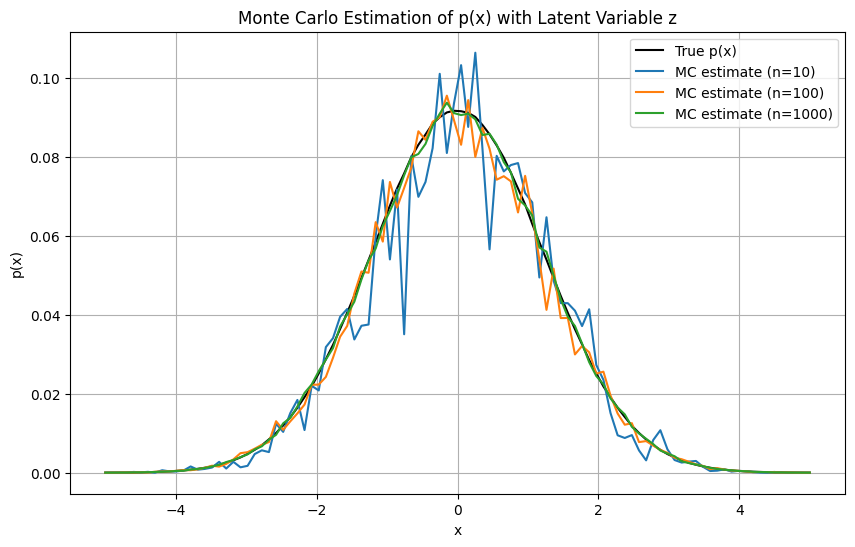

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def p_x_given_z(x, z):
    return np.exp(-0.5 * (x - z)**2) / np.sqrt(2 * np.pi)

def p_z(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

def monte_carlo_estimation(x, num_samples):
    z_samples = np.random.normal(0, 1, num_samples)
    p_x = np.mean([p_x_given_z(x, z) * p_z(z) for z in z_samples])
    return p_x

# Set up the experiment
x_values = np.linspace(-5, 5, 100)
true_p_x = np.array([monte_carlo_estimation(x, 100000) for x in x_values])

# Perform Monte Carlo estimation with different sample sizes
sample_sizes = [10, 100, 1000]
estimates = []

for size in sample_sizes:
    estimate = [monte_carlo_estimation(x, size) for x in x_values]
    estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_p_x, 'k-', label='True p(x)')

for i, estimate in enumerate(estimates):
    plt.plot(x_values, estimate, label=f'MC estimate (n={sample_sizes[i]})')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Monte Carlo Estimation of p(x) with Latent Variable z')
plt.legend()
plt.grid(True)
plt.show()